# Data Cleaning and EDA

### Import packages

In [277]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
import scipy.stats as stats
import pickle

## Data Cleaning

In [259]:
pd.set_option('display.max_columns', None)

In [336]:
countries = {
    'Argentina' : {'commitment_rating' : 1, '2016_emissions' : 482.08,
                   'Forest Land Area Index' : 0.78},
    'Brazil' : {'commitment_rating' : 2, '2016_emissions' : 1379.38, 
                  'Forest Land Area Index' : 0.90},
    'Australia' : {'commitment_rating' : 2, '2016_emissions' : 584.85,
                   'Forest Land Area Index' : 0.97},
    'Canada' : {'commitment_rating' : 2, '2016_emissions' : 779.27,
                   'Forest Land Area Index' : 0.99},
    'China' : {'commitment_rating' : 1, '2016_emissions' : 11886.86,
                   'Forest Land Area Index' : 1.33},
    'Germany' : {'commitment_rating' : 1, '2016_emissions' : 848.76,
                   'Forest Land Area Index' : 1.01},
    'Japan' : {'commitment_rating' : 1, '2016_emissions' : 1263.87,
                   'Forest Land Area Index' : 1.00},
    'Nepal' : {'commitment_rating' : 'NaN', '2016_emissions' : 61.25,
                   'Forest Land Area Index' : 0.75},
    'Norway' : {'commitment_rating' : 2, '2016_emissions' : 46.76,
                   'Forest Land Area Index' : 1.00},
    'Switzerland' : {'commitment_rating' : 2, '2016_emissions' : 48.26,
                   'Forest Land Area Index' : 1.09},
    'UK' : {'commitment_rating' : 2, '2016_emissions' : 474.31,
                   'Forest Land Area Index' : 1.13}
}

In [398]:
df = pd.read_csv('finaldata.csv')

In [399]:
df.shape

(17800, 14)

In [400]:
df_eda = df.drop(['family', 'year', 'criteria', 'justification', 'assessors', 'affil', 'order', 'kingdom'], axis=1)

In [401]:
df_eda = df_eda.loc[(df_eda['reg_stat'] == 'Data Deficient') | (df_eda['reg_stat'] == 'Vulnerable') |
           (df_eda['reg_stat'] == 'Least Concern') | (df_eda['reg_stat'] == 'Endangered') | 
           (df_eda['reg_stat'] == 'Near Threatened') | (df_eda['reg_stat'] == 'Critically Endangered') | 
           (df_eda['reg_stat'] == 'Extinct') | (df_eda['reg_stat'] == 'Regionally Extinct')]

In [402]:
df_eda['reg_stat'].replace(['Data Deficient ', 'Vulnerable', 'Least Concern', 'Endangered', 'Near Threatened',
                           'Critically Endangered', 'Extinct', 'Regionally Extinct'],
                           ['DD',2,0,3,1,4,5,5],inplace=True)

In [403]:
df_eda.rename(columns={'c_lass':'class'},inplace=True)

In [404]:
df_eda = df_eda[df_eda['reg_stat'] != 'Data Deficient']

In [405]:
s = df_eda['class'].value_counts()
df_eda = df_eda[df_eda.isin(s.index[s >= 50]).values]

In [406]:
df_eda['class'].value_counts()

Insecta           3481
Aves              2118
Actinopterygii    1496
Mammalia          1291
Amphibia           654
Reptilia           635
Gastropoda         344
Arachnida          189
Elasmobranchii     108
Bivalvia            80
Malacostraca        74
Entognatha          57
Name: class, dtype: int64

In [407]:
df_eda['phylum'].value_counts()

Chordata      6302
Arthropoda    3801
Mollusca       424
Name: phylum, dtype: int64

In [408]:
df_eda['commitment_rating'] = 0
df_eda['2016_emissions'] = 0
df_eda['Forest Land Area Index'] = 0
for country in countries:
    condition = df_eda['country'] == country
    df_eda.loc[condition, 'commitment_rating'] = countries[country]['commitment_rating']
    df_eda.loc[condition, '2016_emissions'] = countries[country]['2016_emissions']
    df_eda.loc[condition, 'Forest Land Area Index'] = countries[country]['Forest Land Area Index']

In [409]:
df_eda.head()

,country,phylum,class,genus,species,reg_stat,commitment_rating,2016_emissions,Forest Land Area Index
0,Brazil,Chordata,Aves,Anodorhynchus,glaucus,5,2,1379.38,0.9
1,Brazil,Chordata,Elasmobranchii,Carcharhinus,isodon,5,2,1379.38,0.9
2,Brazil,Chordata,Aves,Cichlocolaptes,mazarbarnetti,5,2,1379.38,0.9
3,Brazil,Chordata,Aves,Glaucidium,mooreorum,5,2,1379.38,0.9
4,Brazil,Chordata,Mammalia,Noronhomys,vespuccii,5,2,1379.38,0.9


## EDA

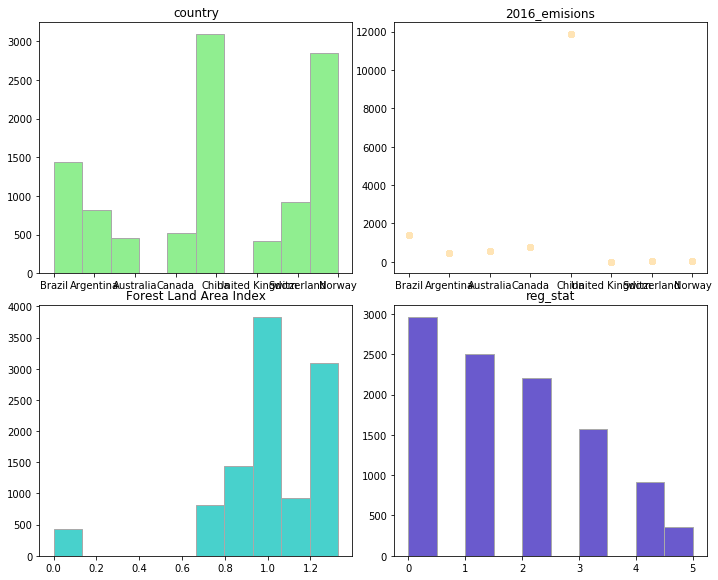

In [410]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

fig.tight_layout()

ax1.hist(df_eda['country'], edgecolor = 'darkgrey', color ='lightgreen')
ax1.set_title('country')

ax2.scatter(y = df_eda['2016_emissions'], x= df_eda['country'], color ='moccasin')
ax2.set_title('2016_emisions')

ax3.hist(df_eda['Forest Land Area Index'], edgecolor = 'darkgrey', color ='mediumturquoise')
ax3.set_title('Forest Land Area Index')

ax4.hist(df_eda['reg_stat'], edgecolor = 'darkgrey', color ='slateblue')
ax4.set_title('reg_stat')

# ax5.hist(df_eda['commitment_rating'], edgecolor = 'darkgrey', color ='lightgreen')
# ax5.set_title('commitment rating')

# ax6.hist(df_eda['2016_emissions'], edgecolor = 'darkgrey', color ='moccasin')
# ax6.set_title('2016 emissions')
# ax6.xaxis.set_ticks(np.arange(100000, 1000000, 200000))

# ax7.hist(df_eda['Forest Land Area Index'], bins=3, edgecolor = 'darkgrey', color ='mediumturquoise')
# ax7.set_title('Forest Land Area Index')
# ax7.xaxis.set_ticks(np.arange(0, 4, 1))

plt.show()

In [411]:
df_eda['reg_stat'].value_counts(normalize=True)

0    0.281467
1    0.238340
2    0.209461
3    0.149520
4    0.086919
5    0.034293
Name: reg_stat, dtype: float64

In [412]:
df_eda.country.value_counts()

China             3092
Norway            2855
Brazil            1445
Switzerland        922
Argentina          815
Canada             519
Australia          457
United Kingdom     422
Name: country, dtype: int64

In [414]:
df_eda['class'].value_counts()

Insecta           3481
Aves              2118
Actinopterygii    1496
Mammalia          1291
Amphibia           654
Reptilia           635
Gastropoda         344
Arachnida          189
Elasmobranchii     108
Bivalvia            80
Malacostraca        74
Entognatha          57
Name: class, dtype: int64

## Feature Engineering

In [417]:
countries = {
    'Insecta' : {'forest_dependence' : 2, 'emission_vulnerability' : 2},
    'Aves' : {'forest_dependence' : 3, 'emission_vulnerability' : 2},
    'Actinopterygii' : {'forest_dependence' : 0, 'emission_vulnerability' : 3},
    'Mammalia' : {'forest_dependence' : 1, 'emission_vulnerability' : 1},
    'Amphibia' : {'forest_dependence' : 2, 'emission_vulnerability' : 0},
    'Reptilia' : {'forest_dependence' : 1, 'emission_vulnerability' : 0},
    'Gastropoda' : {'forest_dependence' : 1, 'emission_vulnerability' : 0},
    'Arachnida' : {'forest_dependence' : 1, 'emission_vulnerability' : 0},
    'Elasmobranchii' : {'forest_dependence' : 0, 'emission_vulnerability' : 3},
    'Bivalvia' : {'forest_dependence' : 0, 'emission_vulnerability' : 3},
    'Malacostraca' : {'forest_dependence' : 1, 'emission_vulnerability' : 2},
    'Entognatha' : {'forest_dependence' : 2, 'emission_vulnerability' : 2}
}

In [418]:
df_eda['forest_dependence'] = 0
df_eda['emission_vulnerability'] = 0
for class_ in df_eda['class']:
    condition = df_eda['class'] == class_
    df_eda.loc[condition, 'forest_dependence'] = countries[class_]['forest_dependence']
    df_eda.loc[condition, 'emission_vulnerability'] = countries[class_]['emission_vulnerability']

In [421]:
df_eda.head()

,country,phylum,class,genus,species,reg_stat,commitment_rating,2016_emissions,Forest Land Area Index,forest_dependence,emission_vulnerability
0,Brazil,Chordata,Aves,Anodorhynchus,glaucus,5,2,1379.38,0.9,3,2
1,Brazil,Chordata,Elasmobranchii,Carcharhinus,isodon,5,2,1379.38,0.9,0,3
2,Brazil,Chordata,Aves,Cichlocolaptes,mazarbarnetti,5,2,1379.38,0.9,3,2
3,Brazil,Chordata,Aves,Glaucidium,mooreorum,5,2,1379.38,0.9,3,2
4,Brazil,Chordata,Mammalia,Noronhomys,vespuccii,5,2,1379.38,0.9,1,1


In [422]:
df_eda.to_csv('final_df.csv')